## R labsession 5
Buriola Lorenzo - 2021860

In [1]:
#Function for sizing plots
fig <- function(width, heigth){
  options(repr.plot.width = width, repr.plot.height = heigth)
}

## Exercise 1

We willa assume a binomial distribution for $y$. 

The _likelihood_ is a binomial distribution with $N$ trials and $y$ successes.

In [2]:
N <- 150
y <- 29
p <- seq(0, 1, 0.001) #grid of point used for plotting

In [3]:
#Likelihood
likelihood <- dbinom(y, prob = p, size = N)

The choosen _prior_ is uniform, this means that the posterior will be the _likelihood_ multiplied by a costant function and renormalized.
(Note that we could have used also the rules of cojugate priors, as the uniform distribution can be seen as a $Beta(1,1)$ distrbution which is the conjugate prior of the binomial distribution.)

In [4]:
#Prior
prior <- rep(1, length(p))
#Posterior
Post <- function(q){
    dbinom(y, prob = q, size = N)
}
#Normalization
Norm <- integrate(Post, lower = 0, upper = 1)$value
posterior <- Post(p)/Norm

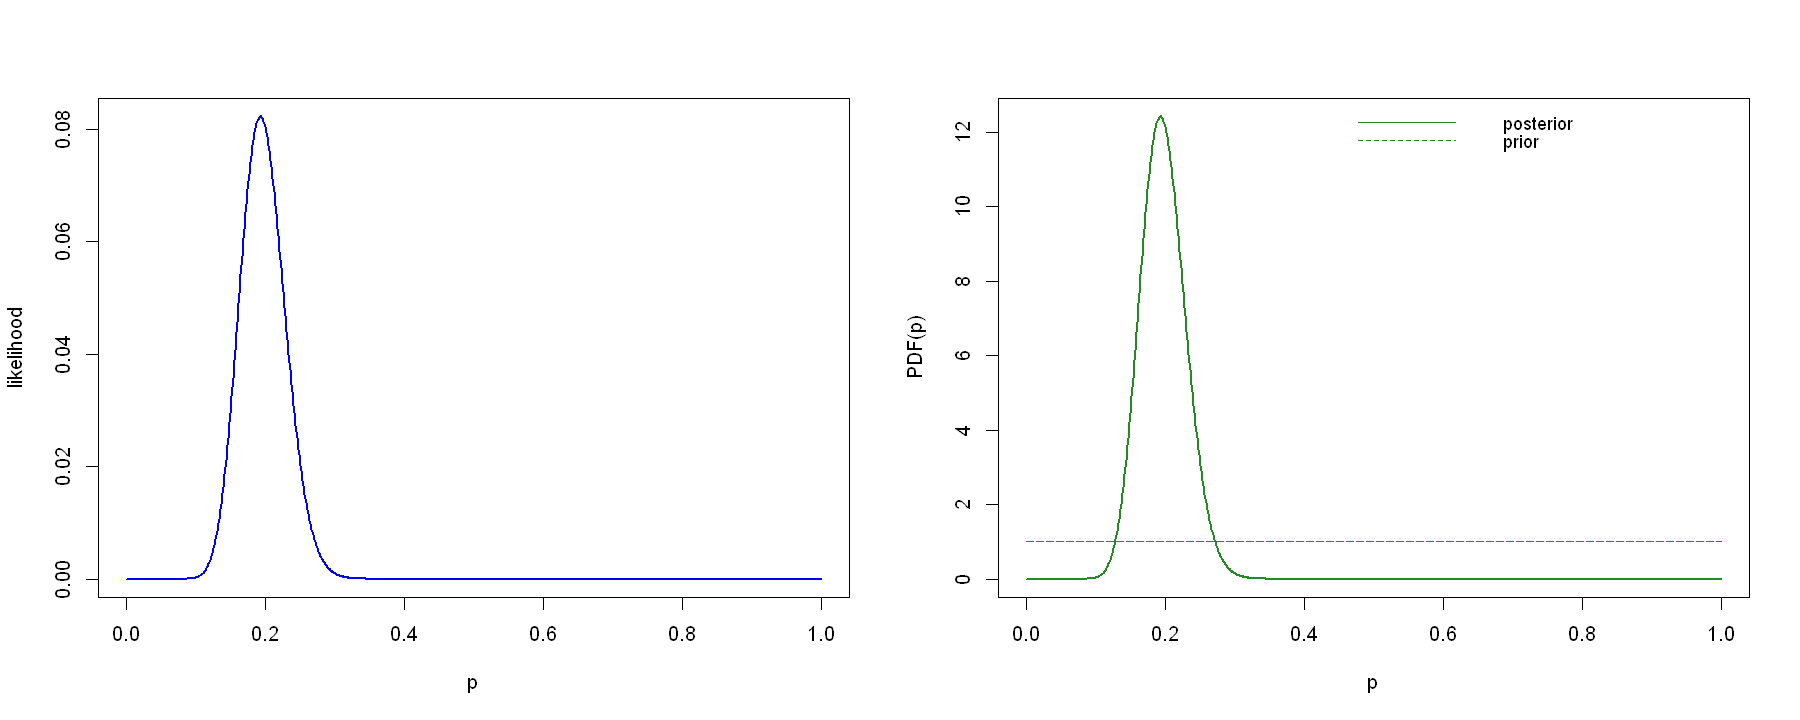

In [5]:
fig(15, 6)
par(mfrow = c(1,2))
plot(p, likelihood, type = 'l', col = 'blue', lwd = 2)
plot(p, posterior, type = 'l', col = 'forestgreen', lwd = 2, ylab = 'PDF(p)')
lines(p, prior, lty = 5, col = 'forestgreen')
legend('topright', inset = 0.01, legend = c('posterior', 'prior'), col=c("forestgreen", "forestgreen"), lty=1:5, cex=0.9, box.lty = 0)

Note that in the first plot the _likelihood_ has been plotted as a function of __p__ (while it is conceptually a function of __data__). This has been done for visualization purpose to compare it with the _posterior_.

## Exercise 2

In [6]:
p <- seq(0, 1, 0.001)

Anna's Prior: $Beta$, $\mu = 0.2$, $\sigma = 0.08$

In [7]:
#From mu, sigma to Beta's coefficient a and b
mu <- 0.2
sd <- 0.08
nu <- mu*(1-mu)/sd^2 - 1
a <- mu*nu
b <- (1-mu)*nu

A_pr <- dbeta(p, shape1 = a, shape2 = b) 

Benni's Prior: __Uniform__

In [8]:
B_pr <- rep(1, length(p))

Chris' Prior: __Trapezoidal__
(note that the 0.7 factor was added for normalization purpose)

In [9]:
trapz <- function(x){
    if (x >= 0 & x < 0.1)
        {20*x/0.7}
    else if (x >= 0.1 & x < 0.3)
        {2/0.7}
    else if (x >= 0.3 & x < 0.5)
        {(5-10*x)/0.7}
    else
        {0}
}

C_pr <- sapply(p, trapz)

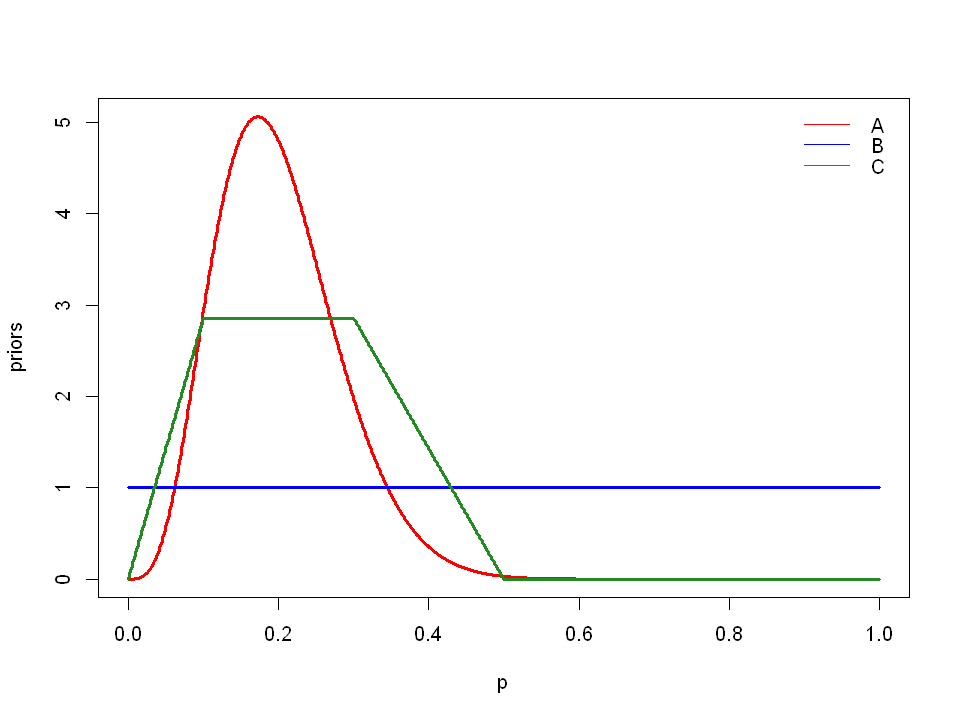

In [10]:
fig(8,6)
plot(p, A_pr, type = 'l', col = 'red', lwd = 2.5, ylab = 'priors')
lines(p, B_pr, col = 'blue', lwd = 2.5)
lines(p, C_pr, col = 'forestgreen', lwd = 2.5)
legend('topright', inset = 0.01, legend = c('A', 'B', 'C'), col=c("red", "blue", "forestgreen"), lty = 1, cex=1, box.lty = 0)

The _likelihood_ is a binomial distribution with $N$ trials and $y$ successes.

In [11]:
y = 26
N = 100

#### Posteriors:

* Anna's posterior can be computed using the rule of conjugate priors, as $Beta$ ditribution in the conjugate one of a binomial distribution: The posterior will be $Beta(a', b')$ with $a' = a + y$ and $b' = b + N -y$.

* Benni's posterior can be computed using the rule of conjugate priors too. A uniform distribution can be seen as a $Beta(1,1)$ distribution so the posterior will be $Beta(1+y, 1+N-y)$

* Chris' posterior must be computed using the integral and renormalizing the result. 

In [12]:
#Anna
aA <- a + y
bA <- b + N - y
A_post <- dbeta(p, shape1 = aA, shape2 = bA) 

#Benni
aB <- 1 + y
bB <- 1 + N - y
B_post <- dbeta(p, shape1 = aB, shape2 = bB) 

#Chris
PPc <- function(x){
    trapz(x)*dbinom(y, prob = x, size = N)
}
Norm <-integrate(Vectorize(PPc), lower = 0, upper = 1)$value
C_post <- sapply(p, PPc)/Norm

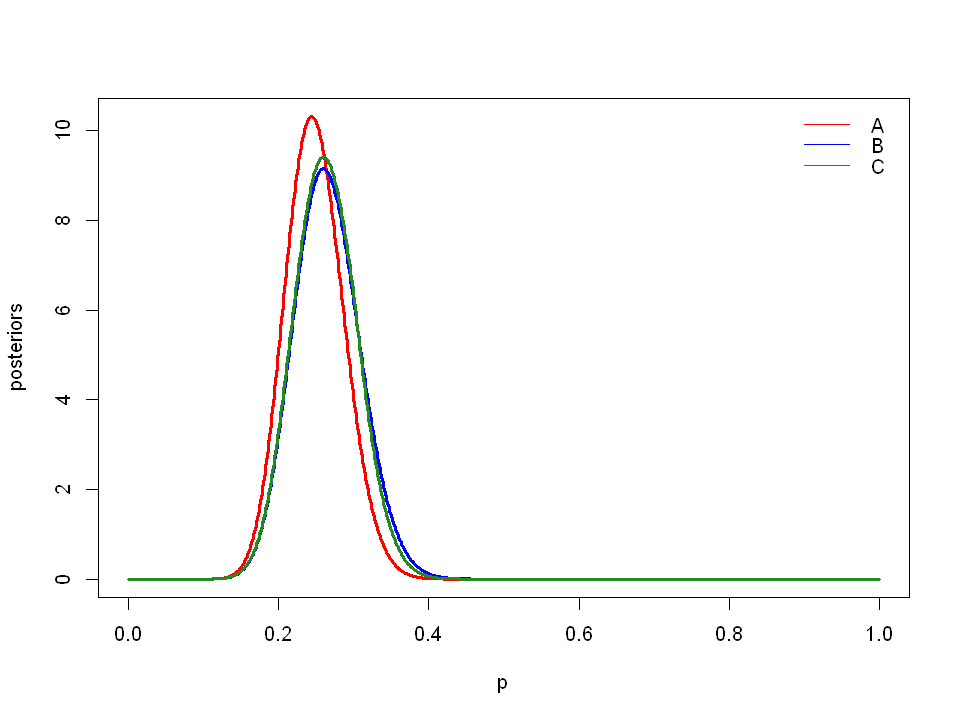

In [13]:
plot(p, A_post, type = 'l', col = 'red', lwd = 2.5, ylab = 'posteriors')
lines(p, B_post, col = 'blue', lwd = 2.5)
lines(p, C_post, col = 'forestgreen', lwd = 2.5)
legend('topright', inset = 0.01, legend = c('A', 'B', 'C'), col=c("red", "blue", "forestgreen"), lty = 1, cex=1, box.lty = 0)

#### Best estimation and credibility interval

The best estimation is computed as the maximum of the posterior (the mode) whil the $95\%$ credibility interval is set such that the area under the curve between the limits is $0.95$.

For Anna's and Benni's posteriors, the best estimation isthe mode of $Beta$ distribution and the credibility interval is computed using _qbeta_ function.

In [14]:
A_p <- (aA-1)/(aA+bA-2)
ls_A <- qbeta(0.025, shape1 = aA, shape2 = bA)
ld_A <- qbeta(0.975, shape1 = aA, shape2 = bA)
cat('Anna: best estimation:', A_p, '\t-\t95% credibility interval:', ls_A, '-', ld_A)

Anna: best estimation: 0.2442623 	-	95% credibility interval: 0.1766865 - 0.3277723

In [15]:
B_p <- (aB-1)/(aB+bB-2)
ls_B <- qbeta(0.025, shape1 = aB, shape2 = bB)
ld_B <- qbeta(0.975, shape1 = aB, shape2 = bB)
cat('Benni: best estimation:', B_p, '\t-\t95% credibility interval:', ls_B, '-', ld_B)

Benni: best estimation: 0.26 	-	95% credibility interval: 0.1841349 - 0.3540134

For Chris' posterior, there is no analytic function to use nor an implemented distribution. We can discretize the parameter axis and compute the best estimation and the credibility interval using it:

In [16]:
best <- p[which.max(C_post)]

In [17]:
I = 0
Norm <-integrate(Vectorize(PPc), lower = 0, upper = 1)$value
for(lim in p){
    I <- integrate(Vectorize(PPc), lower = 0, upper = lim)$value/Norm
    if(I > 0.025){break}
}
ls <- lim

In [18]:
I = 0
for(lim in rev(p)){
    I <- integrate(Vectorize(PPc), lower = lim, upper = 1)$value/Norm
    if(I > 0.025){break}
}
ld <- lim

In [19]:
CI <- integrate(Vectorize(PPc), lower = ls, upper = ld)$value/Norm
cat('Chris: best estimation:', best, '\t-\t', CI*100, '% credibility interval:', ls, '-', ld)

Chris: best estimation: 0.26 	-	 94.93692 % credibility interval: 0.184 - 0.346

Alternatively, for a more precise estimation, we can use some R functions:

In [20]:
best <- optimize(PPc, c(0,1), maximum = T)$maximum
f <- function(p, alpha)
{
    integrate(Vectorize(PPc), lower = 0, upper = p)$value/Norm - alpha
}
ls <- uniroot(f, c(0,1), alpha = 0.025)$root
ld <- uniroot(f, c(0,1), alpha = 0.975)$root
cat('Chris: best estimation:', best, '\t-\t 95% credibility interval:', ls, '-', ld)

Chris: best estimation: 0.26 	-	 95% credibility interval: 0.1837008 - 0.34615

## Exercise 3

The _likelihood_ is a binomial distribution with $N$ trials and $y$ successes.

In [21]:
coin <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H',
          'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H')
bin <- ifelse(coin == 'T', 1, 0)
N = length(bin)
y = sum(bin)
p <- seq(0, 1, 0.001)

#Likelihood
likelihood <- dbinom(y, prob = p, size = N)

#### Flat Prior

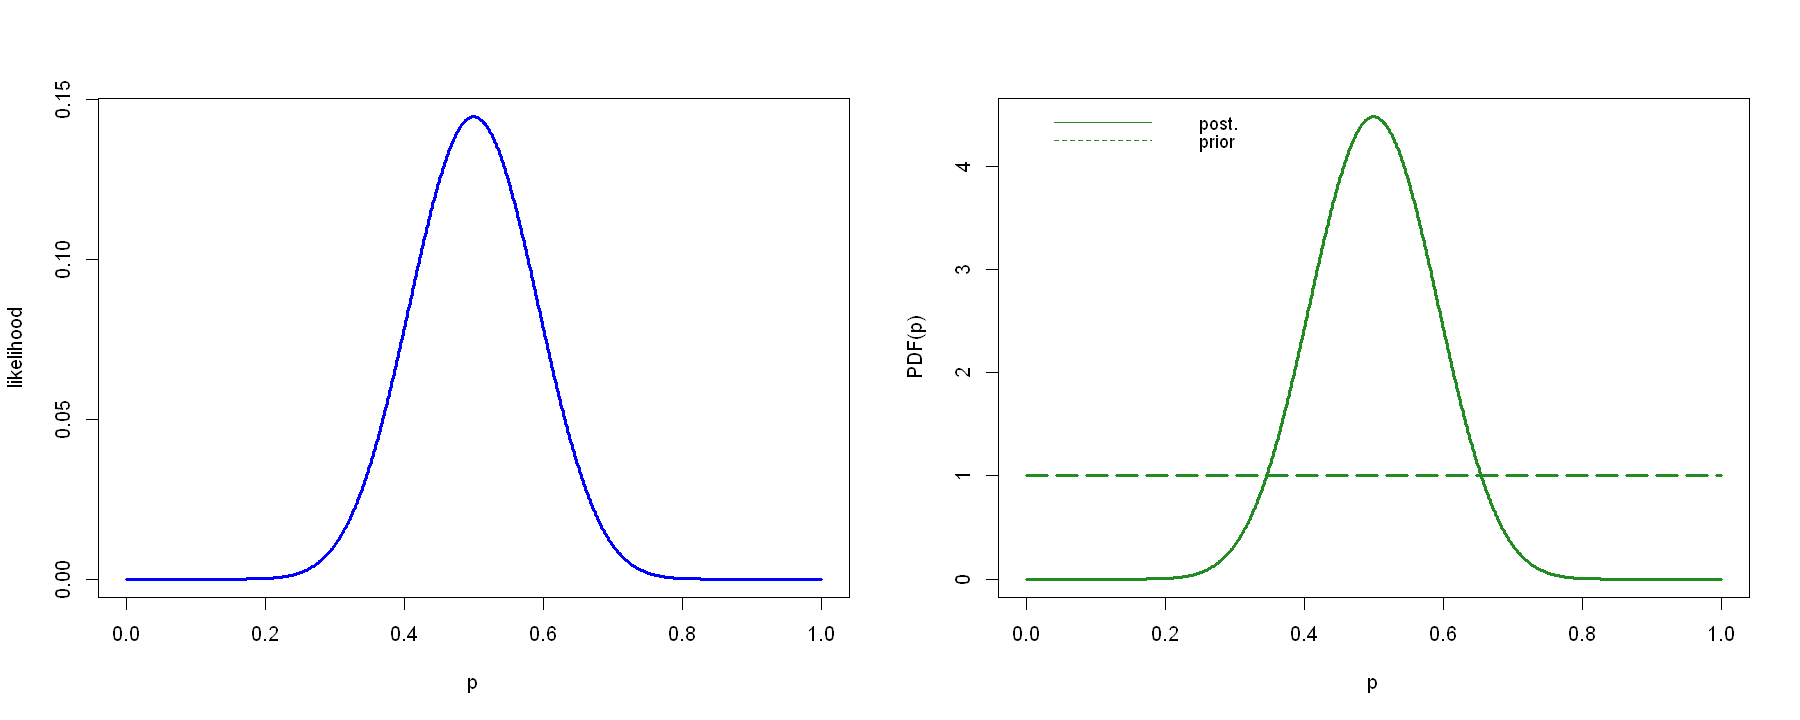

In [22]:
#Prior
prior <- rep(1, length(p))

#Posterior (The rule of conjugate priors are used)
a1 <- y+1
b1 <- 1+N-y
posterior <- dbeta(p, shape1 = a1, shape2 = b1)

fig(15, 6)
par(mfrow = c(1, 2))
plot(p, likelihood, type = 'l', col = 'blue', lwd = 2.5)

plot(p, posterior, type = 'l', col = 'forestgreen', lwd = 2.5, ylab = 'PDF(p)')
lines(p, prior, type = 'l', col = 'forestgreen', lty = 5,  lwd = 2.5)
legend('topleft', inset = 0.01, legend = c('post.', 'prior'), col=c("forestgreen", "forestgreen"), lty=1:5, cex=0.9, box.lty = 0)

Note that, aolso in this case, the _likelihood_ was plotted as a function of __p__ for comparison purpose.

The best estimation and the credibility interval are computed as before

In [23]:
best <- (a1-1)/(a1+b1-2)
ls <- qbeta(0.025, shape1 = a1, shape2 = b1)
ld <- qbeta(0.975, shape1 = a1, shape2 = b1)
cat('Best estimation:', best, '\t-\t95% credibility interval:', ls, '-', ld)

Best estimation: 0.5 	-	95% credibility interval: 0.330606 - 0.669394

Let us plot the final posterior enhancing the best estimation and the credibility interval

Warning message:
"Removed 662 rows containing missing values (position_stack)."


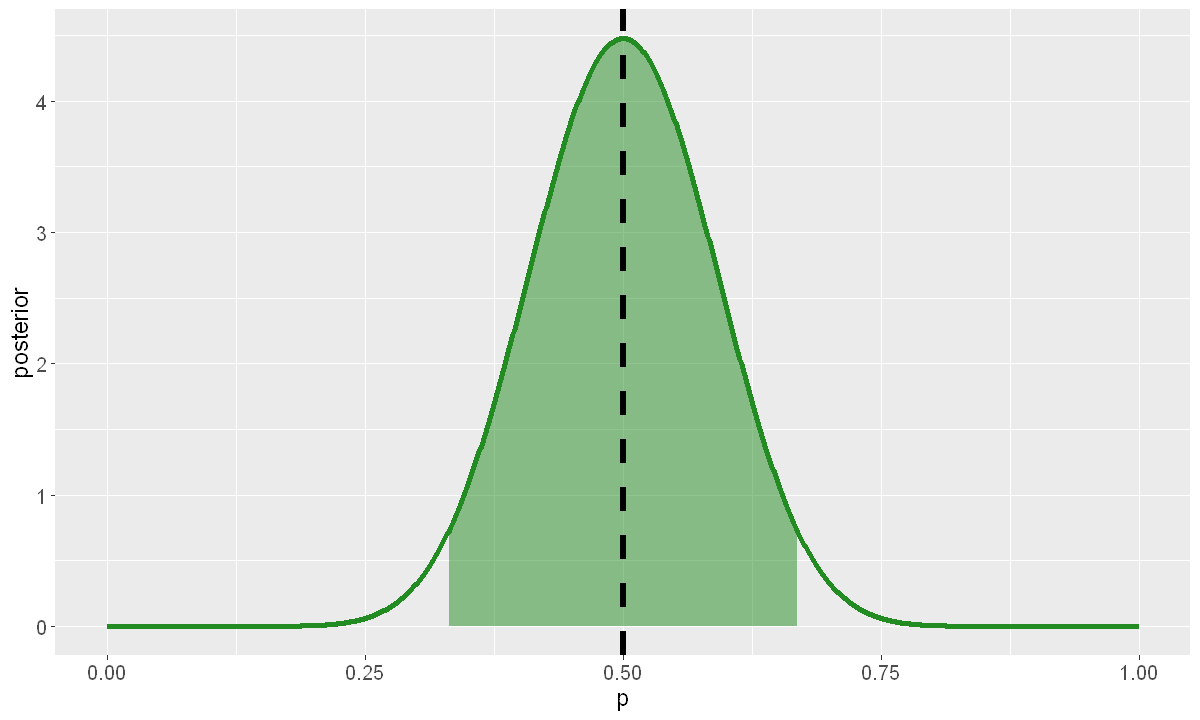

In [24]:
library(ggplot2)
fig(10, 6)
q <- ggplot(data.frame(p, posterior), aes(x = p, y = posterior))
q + geom_line(size = 1.5, color = 'forestgreen') + 
geom_area(aes(ifelse(p>ls & p <ld, p, NA)), fill = 'forestgreen', alpha = 0.5) +
geom_vline(xintercept = best, col = 'black', size = 1.7, linetype = 'dashed') +
theme(axis.title.x = element_text(size=14), axis.text.x = element_text(size=12)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12))

#### Beta Prior (given $\mu$ and $\sigma$)

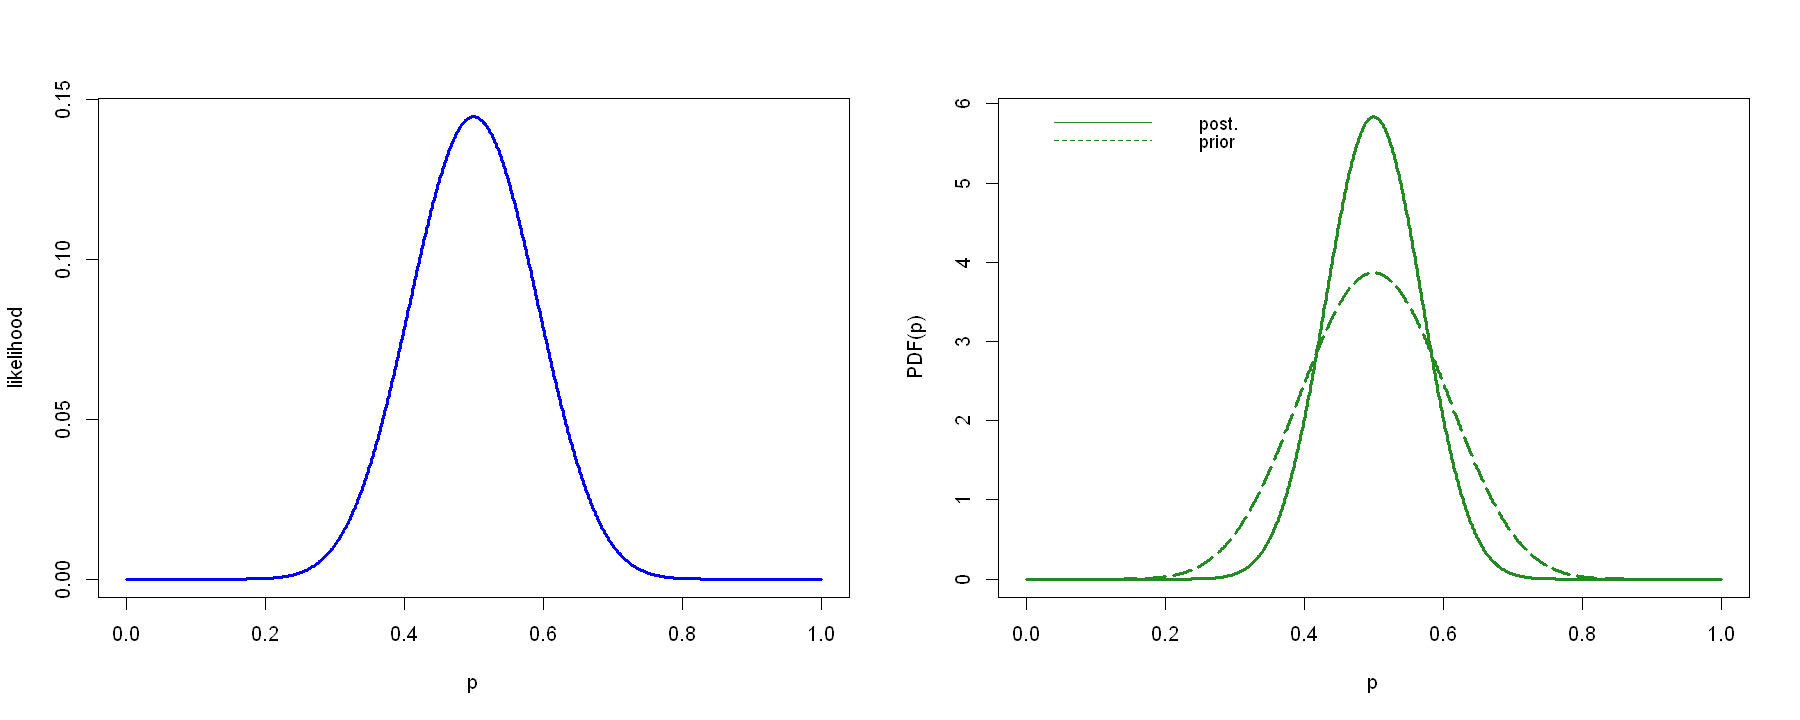

In [25]:
# Prior
mu <- 0.5
sd <- 0.1
nu <- mu*(1-mu)/sd^2 - 1
a_i <- mu*nu
b_i <- (1-mu)*nu
prior <- dbeta(p, shape1 = a_i, shape2 = b_i)

#Posterior (The rule of conjugate priors are used)
a_f <- a_i+y
b_f <- b_i+N-y
posterior <- dbeta(p, shape1 = a_f, shape2 = b_f)

fig(15, 6)
par(mfrow = c(1, 2))
plot(p, likelihood, type = 'l', col = 'blue', lwd = 2.5)
plot(p, posterior, type = 'l', col = 'forestgreen', lwd = 2.5, ylab = 'PDF(p)')
lines(p, prior, type = 'l', col = 'forestgreen', lty = 5, lwd = 2.5)
legend('topleft', inset = 0.01, legend = c('post.', 'prior'), col=c("forestgreen", "forestgreen"), lty=1:5, cex=0.9, box.lty = 0)

In [26]:
best <- (a_f-1)/(a_f+b_f-2)
ls <- qbeta(0.025, shape1 = a_f, shape2 = b_f)
ld <- qbeta(0.975, shape1 = a_f, shape2 = b_f)
cat('Best estimation:', best, '\t-\t95% credibility interval:', ls, '-', ld)

Best estimation: 0.5 	-	95% credibility interval: 0.3683954 - 0.6316046

Also in this case let us plot the final posterior enhancing the best estimation and the credibility interval

Warning message:
"Removed 738 rows containing missing values (position_stack)."


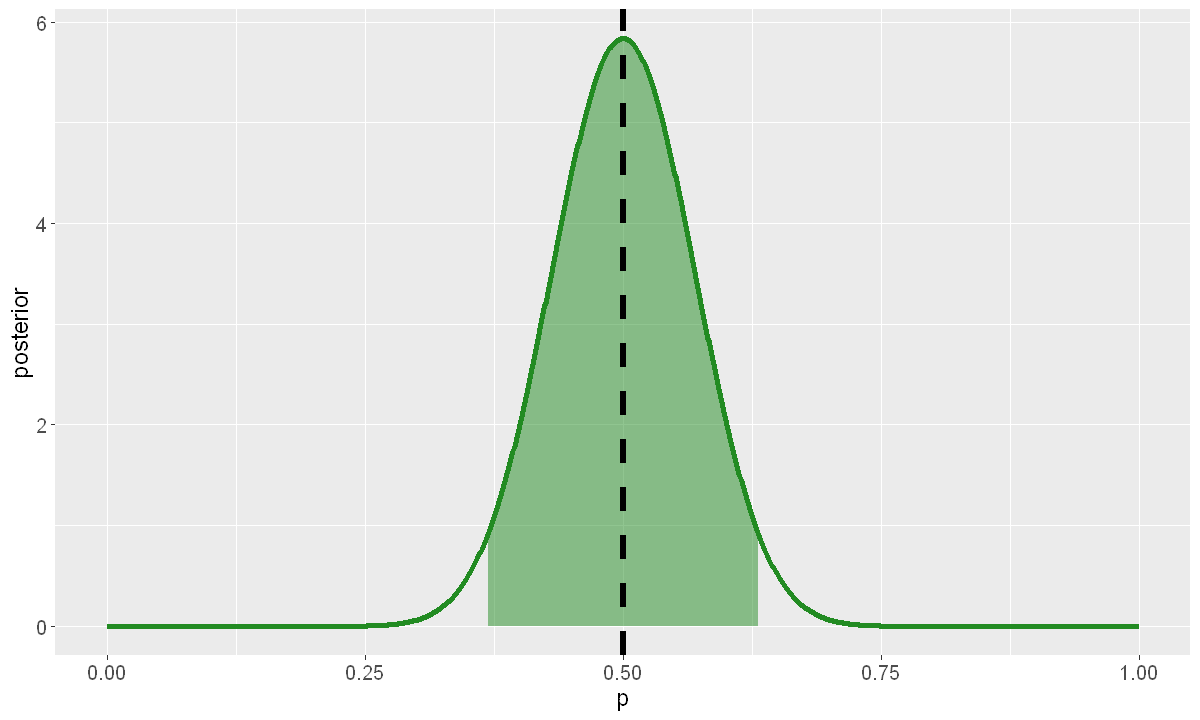

In [27]:
library(ggplot2)
fig(10, 6)
q <- ggplot(data.frame(p, posterior), aes(x = p, y = posterior))
q + geom_line(size = 1.5, color = 'forestgreen') +
geom_area(aes(ifelse(p>ls & p <ld, p, NA)), fill = 'forestgreen', alpha = 0.5) +
geom_vline(xintercept = best, col = 'black', size = 1.7, linetype = 'dashed') +
theme(axis.title.x = element_text(size=14), axis.text.x = element_text(size=12)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12))

#### Sequential analysis

In [28]:
library(magrittr)

The following function performs the sequential analysis of the coin tossing and return a dataframe with the best estimation and the limits of the 95% credibility interval for each trial

In [29]:
propagator <- function(coin, a, b){
    bin <- ifelse(coin == 'T', 1, 0)
    #Initialising the needed vectors
    best_list <- c()
    ls <- c()
    ld <- c()
    #This vector is needed to record the initial prior used
    Prior <- rep(paste('Prior: shape1 =', toString(a), 'shape2 =',toString(b)), length(coin))
    for (i in bin){
        #Conjugate priors rule
        a <- a + i
        b <- b + (1-i)
        best <- (a-1)/(a+b-2)
        best_list <- append(best_list, best)
        #The limits of the credibility interval are computed in the classical way, with an exception:
        #if the mode of the distribution is an extreme (0 or 1), the credibility interval extremes are
        #computed using only one tail (0.05 - 1) or (0 - 0.95), to avoid that the best estimation falls 
        #out of the credibility interval itself.
        if (best == 0){
            ls <- append(ls, 0)
            ld <- append(ld, qbeta(0.95, shape1 = a, shape2 = b)) 
        }
        else if (best == 1){
            ls <- append(ls, qbeta(0.05, shape1 = a, shape2 = b))
            ld <- append(ld, 1)
        }
        else{
            ls <- append(ls, qbeta(0.025, shape1 = a, shape2 = b))
            ld <- append(ld, qbeta(0.975, shape1 = a, shape2 = b))
        }
    }
    n <- seq(length(bin))
    #final dataframe
    data.frame(n, coin, best_list, ls, ld, Prior)
}

__Uniform prior__

In [30]:
a = 1
b = 1
data1 <- propagator(coin, a, b)

In [31]:
data1[N, 3:5]

,best_list,ls,ld
,<dbl>,<dbl>,<dbl>
30,0.5,0.330606,0.669394


As expected, the final estimation and credibility interval (after we know the results of all tosses) is equal to the one computed before using all data at once.

__$Beta$ prior__

In [32]:
a = a_i
b = b_i
data2 <- propagator(coin, a, b)

In [33]:
data2[N, 3:5]

,best_list,ls,ld
,<dbl>,<dbl>,<dbl>
30,0.5,0.3683954,0.6316046


Also in this case analysing the data together or sequentially doen not change.

In order to visualize the trend of probability as a function of __n_trial__ a plot is made.

In [34]:
data <- rbind(data1, data2)

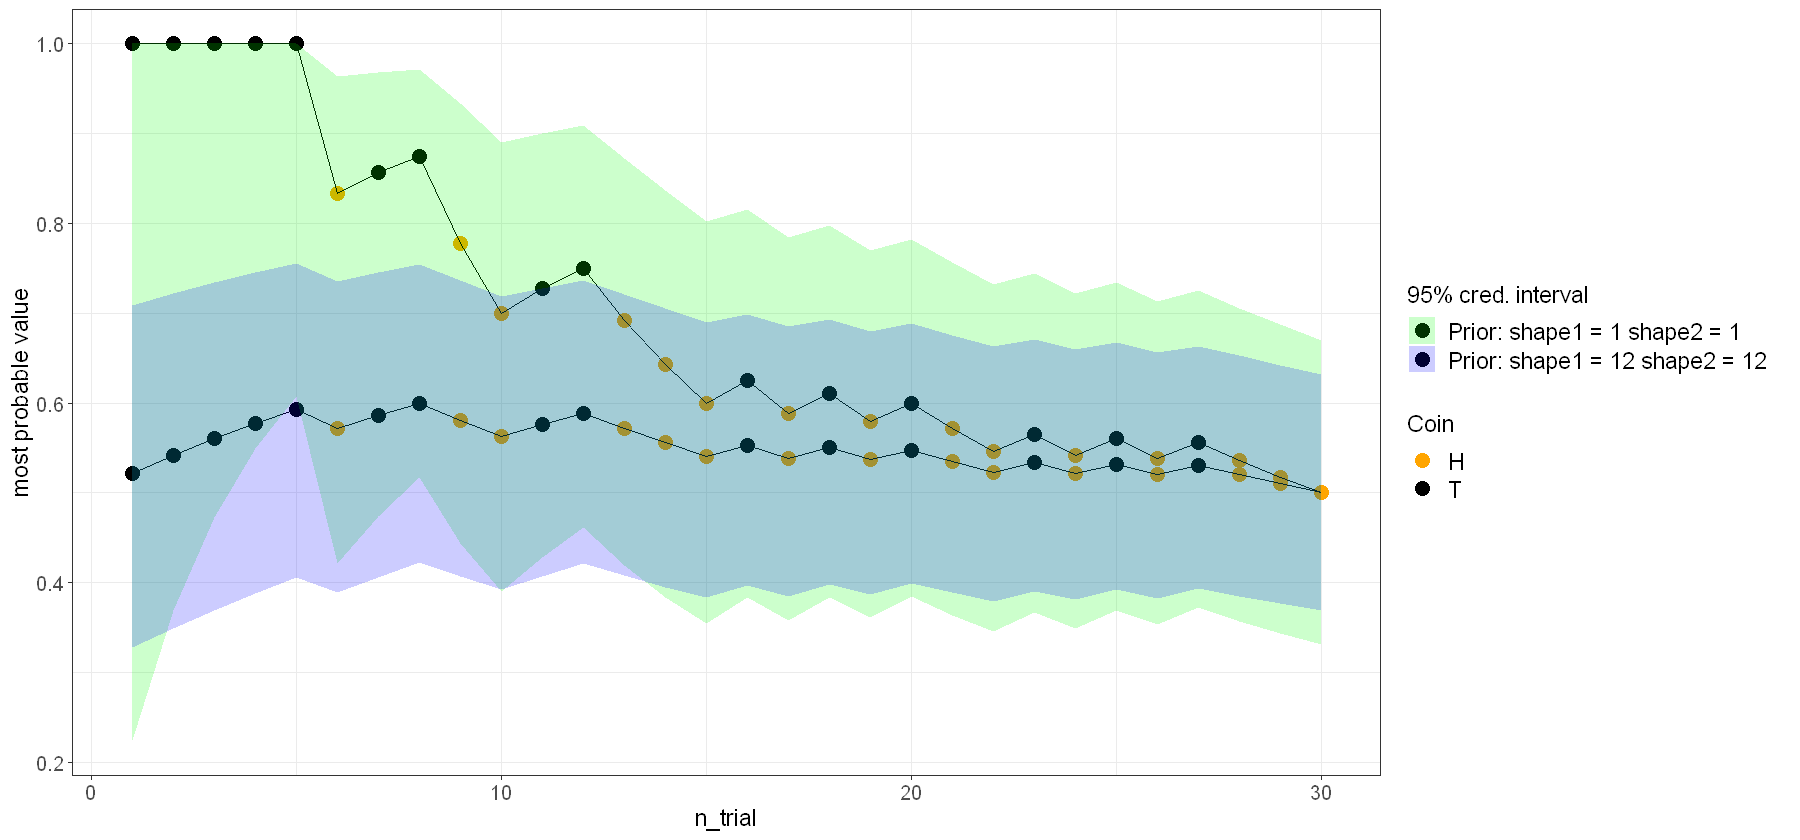

In [35]:
fig(15, 7)
p <- data %>% ggplot(aes(n, best_list, fill = Prior))
p + geom_point(aes(col = coin),size = 4) + geom_line(col = 'black') +
geom_ribbon(aes(ymin = ls, ymax = ld), alpha = 0.2) +
xlab('n_trial') + ylab('most probable value') +
scale_color_manual(name = 'Coin', values = c('H' = 'orange', 'T' = 'black')) +
scale_fill_manual(name = '95% cred. interval', values = c('green', 'blue')) +
theme_bw()+
theme(strip.text.x = element_text(size = 14)) +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=12)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12)) +
theme(legend.text = element_text(size = 14), legend.title = element_text(size = 14))